<a href="https://colab.research.google.com/github/Ashish-Soni08/DPS_Challenge/blob/main/DPS_Challenge_Ashish_Soni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mission 1: Create an AI model

Here you will see the number of accidents for specific categories per month. Important are the first 5 columns:
- Category
- Accident-type (insgesamt means total for all subcategories)
- Year
- Month
- Value




## Import Packages and Data

In [43]:
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pickle

In [2]:
data = pd.read_csv("/content/drive/MyDrive/dps_data.csv")

## Explore Data

**Summary of the data set:** The data set for monthly traffic accidents includes the topics:- 

- traffic accidents 
- escape accidents 
- alcohol accidents 

In [3]:
data.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2021,202101,NaN,28.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2021,202102,NaN,40.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2021,202103,NaN,27.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2021,202104,NaN,26.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2021,202105,NaN,40.0,NaN,NaN,NaN


In [4]:
print("Number of rows and columns in the dataset are:",  data.shape)

Number of rows and columns in the dataset are: (1995, 9)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MONATSZAHL                      1995 non-null   object 
 1   AUSPRAEGUNG                     1995 non-null   object 
 2   JAHR                            1995 non-null   int64  
 3   MONAT                           1995 non-null   object 
 4   WERT                            1911 non-null   float64
 5   VORJAHRESWERT                   1904 non-null   float64
 6   VERAEND_VORMONAT_PROZENT        1756 non-null   float64
 7   VERAEND_VORJAHRESMONAT_PROZENT  1819 non-null   float64
 8   ZWOELF_MONATE_MITTELWERT        1764 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 140.4+ KB


In [6]:
data = data.rename(columns={'MONATSZAHL' : 'category',
                     'AUSPRAEGUNG': 'accident_type',
                     'JAHR'       :'year',
                     'MONAT'      : 'month',
                     'WERT'       : 'value'})

In [7]:
columns = ['category', 'accident_type', 'year', 'month', 'value']

data = data[columns]

In [8]:
data.columns

Index(['category', 'accident_type', 'year', 'month', 'value'], dtype='object')

In [9]:
data.describe(include=["number"])

,year,value
count,1995.000000,1911.000000
mean,2010.463158,1440.540031
std,6.326381,4655.514611
min,2000.000000,0.000000
25%,2005.000000,41.000000
50%,2010.000000,399.000000
75%,2016.000000,864.000000
max,2021.000000,46988.000000


In [10]:
data.describe(include="object")

,category,accident_type,month
count,1995,1995,1995
unique,3,3,265
top,Verkehrsunfälle,insgesamt,Summe
freq,855,855,147


In [11]:
# Check if missing values exist

missing_values_count = data.isnull().sum()
missing_values_count

category          0
accident_type     0
year              0
month             0
value            84
dtype: int64

In [12]:
# Check if duplicate rows exist

data.duplicated().sum()

0

In [13]:
print("Number of distinct categories:", data['category'].nunique())
print("The unique values are:", data['category'].unique())

Number of distinct categories: 3
The unique values are: ['Alkoholunfälle' 'Fluchtunfälle' 'Verkehrsunfälle']


In [14]:
print("Number of distinct accident_type:", data['accident_type'].nunique())
print("The unique values are:", data['accident_type'].unique())

Number of distinct accident_type: 3
The unique values are: ['insgesamt' 'Verletzte und Getötete' 'mit Personenschäden']


In [15]:
print("Number of distinct years:", data['year'].nunique())
print("The unique values are:", data['year'].unique())

Number of distinct years: 22
The unique values are: [2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008
 2007 2006 2005 2004 2003 2002 2001 2000]


In [16]:
print("Number of distinct months:", data['month'].nunique())
print("The unique values are:", data['month'].unique())

Number of distinct months: 265
The unique values are: ['202101' '202102' '202103' '202104' '202105' '202106' '202107' '202108'
 '202109' '202110' '202111' '202112' 'Summe' '202001' '202002' '202003'
 '202004' '202005' '202006' '202007' '202008' '202009' '202010' '202011'
 '202012' '201901' '201902' '201903' '201904' '201905' '201906' '201907'
 '201908' '201909' '201910' '201911' '201912' '201801' '201802' '201803'
 '201804' '201805' '201806' '201807' '201808' '201809' '201810' '201811'
 '201812' '201701' '201702' '201703' '201704' '201705' '201706' '201707'
 '201708' '201709' '201710' '201711' '201712' '201601' '201602' '201603'
 '201604' '201605' '201606' '201607' '201608' '201609' '201610' '201611'
 '201612' '201501' '201502' '201503' '201504' '201505' '201506' '201507'
 '201508' '201509' '201510' '201511' '201512' '201401' '201402' '201403'
 '201404' '201405' '201406' '201407' '201408' '201409' '201410' '201411'
 '201412' '201301' '201302' '201303' '201304' '201305' '201306' '201307

In [17]:
# Check the index of rows with value of month = 'Summe'
idx = data.index[data['month'] == 'Summe'].tolist()
print(idx)

[12, 25, 38, 51, 64, 77, 90, 103, 116, 129, 142, 155, 168, 181, 194, 207, 220, 233, 246, 259, 272, 297, 310, 323, 336, 349, 362, 375, 388, 401, 414, 427, 440, 453, 466, 479, 492, 505, 518, 531, 544, 557, 582, 595, 608, 621, 634, 647, 660, 673, 686, 699, 712, 725, 738, 751, 764, 777, 790, 803, 816, 829, 842, 867, 880, 893, 906, 919, 932, 945, 958, 971, 984, 997, 1010, 1023, 1036, 1049, 1062, 1075, 1088, 1101, 1114, 1127, 1152, 1165, 1178, 1191, 1204, 1217, 1230, 1243, 1256, 1269, 1282, 1295, 1308, 1321, 1334, 1347, 1360, 1373, 1386, 1399, 1412, 1437, 1450, 1463, 1476, 1489, 1502, 1515, 1528, 1541, 1554, 1567, 1580, 1593, 1606, 1619, 1632, 1645, 1658, 1671, 1684, 1697, 1722, 1735, 1748, 1761, 1774, 1787, 1800, 1813, 1826, 1839, 1852, 1865, 1878, 1891, 1904, 1917, 1930, 1943, 1956, 1969, 1982]


In [18]:
# Drop those rows

data = data.drop(idx)

In [19]:
print("Number of Rows and columns in Data after deleting wrong entries for month", data.shape)

# print("The unique values are:", data['month'].unique())  # 'Summe' does not exist now

Number of Rows and columns in Data after deleting wrong entries for month (1848, 5)


In [20]:
dps_data = data.copy()

In [21]:
# Get the last two numbers for month, e.g. For the value 200007, get 07 as the new value for month column 
dps_data['month'] = dps_data['month'].str[-2:]

In [22]:
dps_data.head()

,category,accident_type,year,month,value
0,Alkoholunfälle,insgesamt,2021,01,NaN
1,Alkoholunfälle,insgesamt,2021,02,NaN
2,Alkoholunfälle,insgesamt,2021,03,NaN
3,Alkoholunfälle,insgesamt,2021,04,NaN
4,Alkoholunfälle,insgesamt,2021,05,NaN


# Visualization

<Figure size 864x432 with 0 Axes>

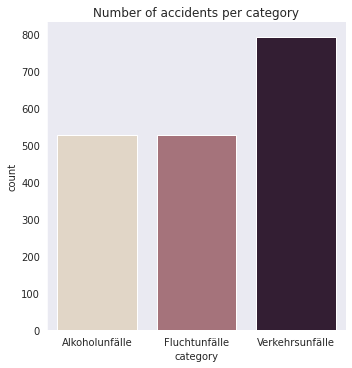

In [23]:
# Size
plt.figure(figsize=(12,6))

# Style
sns.set_style("dark")

# Bar chart showing number of accidents per category
plot = sns.catplot(x="category", kind="count", palette="ch:.25", data=dps_data)

# Title
plt.title('Number of accidents per category')

# Save figure
plot.savefig("plot.png")

# Problem Statement

The dataset currently contains values until the end of 2020. Create an application that forecasts the values for:

- Category: 'Alkoholunfälle'
- Type: 'insgesamt
- Year: '2021'
- Month: '01'

We are predicting a numerical value. So its a Regression Task.





In [24]:
mode_for_value_col= dps_data['value'].mode()
print(mode_for_value_col)

# Choosing the second value (other two values can be used too)
mode = mode_for_value_col[1]
print("mode chosen:", mode)

0    21.0
1    27.0
2    35.0
dtype: float64
mode chosen: 27.0


In [25]:
dps_data['value'].fillna(mode, inplace=True)

In [26]:
# Check: missing values were filled
dps_data.head()

,category,accident_type,year,month,value
0,Alkoholunfälle,insgesamt,2021,01,27.0
1,Alkoholunfälle,insgesamt,2021,02,27.0
2,Alkoholunfälle,insgesamt,2021,03,27.0
3,Alkoholunfälle,insgesamt,2021,04,27.0
4,Alkoholunfälle,insgesamt,2021,05,27.0


In [27]:
final_df = dps_data.copy()
final_df.head()

,category,accident_type,year,month,value
0,Alkoholunfälle,insgesamt,2021,01,27.0
1,Alkoholunfälle,insgesamt,2021,02,27.0
2,Alkoholunfälle,insgesamt,2021,03,27.0
3,Alkoholunfälle,insgesamt,2021,04,27.0
4,Alkoholunfälle,insgesamt,2021,05,27.0


In [28]:
final_df['month'] = final_df['month'].astype('int64')

In [29]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1848 entries, 0 to 1994
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   category       1848 non-null   object 
 1   accident_type  1848 non-null   object 
 2   year           1848 non-null   int64  
 3   month          1848 non-null   int64  
 4   value          1848 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 166.6+ KB


In [30]:
final_df.head()

,category,accident_type,year,month,value
0,Alkoholunfälle,insgesamt,2021,1,27.0
1,Alkoholunfälle,insgesamt,2021,2,27.0
2,Alkoholunfälle,insgesamt,2021,3,27.0
3,Alkoholunfälle,insgesamt,2021,4,27.0
4,Alkoholunfälle,insgesamt,2021,5,27.0


In [31]:
# Selecting the Prediction Target
y = final_df.value

In [32]:
# Select Features

features = ['category', 'accident_type', 'month', 'year']

X = final_df[features]
X.head()

,category,accident_type,month,year
0,Alkoholunfälle,insgesamt,1,2021
1,Alkoholunfälle,insgesamt,2,2021
2,Alkoholunfälle,insgesamt,3,2021
3,Alkoholunfälle,insgesamt,4,2021
4,Alkoholunfälle,insgesamt,5,2021


In [33]:
from sklearn.model_selection import train_test_split

X_train, val_X,  y_train, val_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [34]:
# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['category', 'accident_type']


In [35]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(val_X[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = val_X.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = val_X.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_val_X= pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [36]:
OH_X_train.shape, OH_val_X.shape

((1478, 8), (370, 8))

In [37]:
from sklearn.tree import DecisionTreeRegressor

# Define model
dps_model = DecisionTreeRegressor(random_state=1)

# Fit model
dps_model.fit(OH_X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


DecisionTreeRegressor(random_state=1)

In [38]:
from sklearn.metrics import mean_absolute_error

predicted_values = dps_model.predict(OH_val_X)
mean_absolute_error(val_y, predicted_values)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


74.6

In [39]:
print("Making predictions:")
print(OH_val_X.head())
print("The predictions are")
print(dps_model.predict(OH_val_X.head()))

Making predictions:
      month  year    0    1    2    3    4    5
1781      7  2016  0.0  0.0  1.0  1.0  0.0  0.0
1322      1  2007  0.0  0.0  1.0  0.0  1.0  0.0
1712      3  2021  0.0  0.0  1.0  1.0  0.0  0.0
1647      2  2004  0.0  0.0  1.0  0.0  0.0  1.0
19        7  2020  1.0  0.0  0.0  0.0  1.0  0.0
The predictions are
[ 809. 2893.   27.  232.   51.]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [40]:
val_y.head()

1781     742.0
1322    2735.0
1712      27.0
1647     240.0
19        58.0
Name: value, dtype: float64

In [41]:
!pwd

/content


# Saving the Model

In [44]:
pkl_filename = "/content/dps_model.pkl"

with open(pkl_filename, "wb") as file:
  pickle.dump(dps_model, file)

# Loading the Model

In [46]:
with open(pkl_filename, "rb") as file:
  pickle.load(file)

In [48]:
dps_model

DecisionTreeRegressor(random_state=1)